In [1]:
#este metodo es solo polinomial

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Minimos.dat' 

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

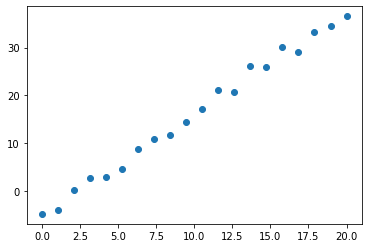

In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

<ErrorbarContainer object of 3 artists>

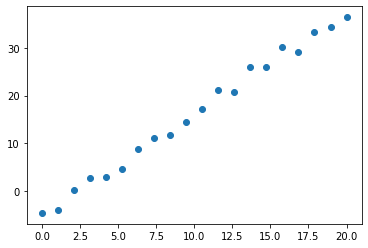

In [4]:
N = len(x)
sigma= np.random.uniform(0,0.2,N)
plt.errorbar(x,y,yerr=sigma,fmt='o')

In [9]:
def GetFit(x,y,n=2):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [33]:
n = 2
param = GetFit(x,y,n)
param

array([-5.45282232e+00,  2.22752179e+00, -5.12424875e-03])

In [34]:
def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [35]:
X = sym.Symbol('x',real=True)
f = GetModel(X,param)
f

-0.00512424874937852*x**2 + 2.22752178860941*x - 5.45282232464359

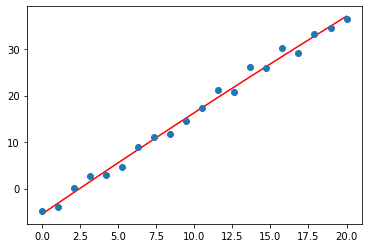

In [36]:
_x= np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(_x,_y,color='r')

**Varianza**

In [39]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot( R.T, R )/(N-len(p))
    
    print(sigma2)
    
    CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    return CVar
    
    

In [40]:
Cov = GetError(x,y,param)
Cov

1.3120357599935037


array([[ 4.86475583e-01, -9.46965985e-02,  3.84451980e-03],
       [-9.46965985e-02,  2.61292453e-02, -1.21743121e-03],
       [ 3.84451980e-03, -1.21743121e-03,  6.08715573e-05]])

In [41]:
std = np.sqrt(np.diag(Cov))
std 
#la diganonal da el error

array([0.69747802, 0.16164543, 0.00780202])